# III. Dataset Insights

So far we have only taken a quick glance at the data to get a general understanding of the kind of data we are manipulating. Now the goal is to go a little bit more in depth.


In [1]:
'''
Dataset constants.
'''

OUTBOUND_PATH = "../data/outbound/handson-housing"

In [2]:
'''
Import dependencies.
'''

import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

%matplotlib inline

In [3]:
'''
Load the training dataset.
'''

housing = pd.read_csv(OUTBOUND_PATH + "/housing_train.csv.gz", compression="gzip")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


## Data Visualization

Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data.

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

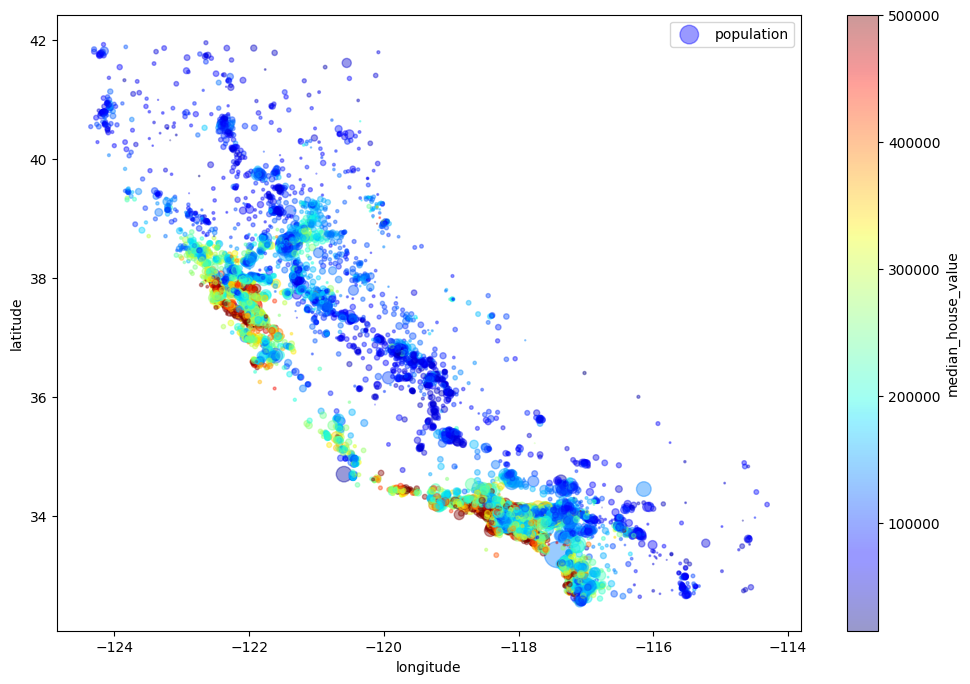

In [4]:
'''
Visualize training data.
'''

housing.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population",
    c="median_house_value", cmap="jet", colorbar=True,
    figsize=(12,8),
)

The image above tells us that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density. It will probably be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although in Northern California the housing prices in coastal districts are not to high, so it is not a simple rule.

## Correlations

Since the dataset is not too large, we can easily compute the _standard correlation coefficient_ (a.k.a. Pearson's _`r`_) between every pair of attributes:

* Coefficient close to `1` means that there is a strong positive correlation. For example, when one attribute goes up, the second attribute goes up too.
* Coefficient close to `-1` means that there is a strong negative correlation. For example, when one attribute goes up, the second attribute goes down.
* Coefficient close to `0` means that there is no linear correlation.

> The correlation coefficient only measures **linear** correlations (e.g., when _`x`_ goes up, then _`y`_ goes up or down). But it may completely miss out on nonlinear relationships (e.g., when _`x`_ close to `0`, then _`y`_ goes up or down).


In [5]:
'''
Calculate standard correlation coefficient (a.k.a. Pearson's r)
'''

correlation = housing.corr(numeric_only=True)
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


Let's take a look at how much each attribute correlates with the `median_house_value` attribute.

In [6]:
correlation["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

We can see that the `median_house_value` attribute correlates with the `median_income` attribute (`0.687151`). The median house value tends to go up when the median income goes up.

Also, we can see a small negative correlation between the `latitude` attribute and the `median_house_value` attribute (`-0.142673`). Prices have a slight tendency to go down when you go north.

Let's focus on a few promising attributes that seem most correlated with the `median_house_value` attribute and try to visualize those correlations.

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='latitude', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot: xlabel='latitude', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_ag

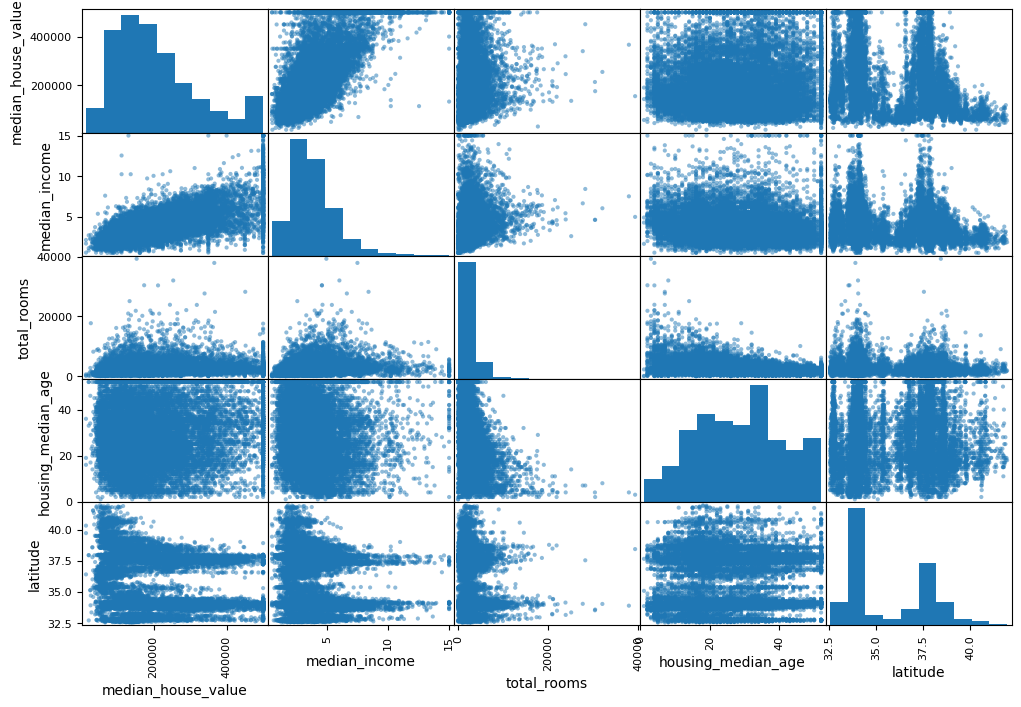

In [7]:
'''
Vizualize attribute correlations.
'''

scatter_matrix(
    housing[[
        "median_house_value",
        "median_income",
        "total_rooms",
        "housing_median_age",
        "latitude",
    ]], 
    figsize=(12,8)
)

The most promising attribute to predict the median house value is the `median_income`, so let's zoom in on their correlation scatterplot.

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

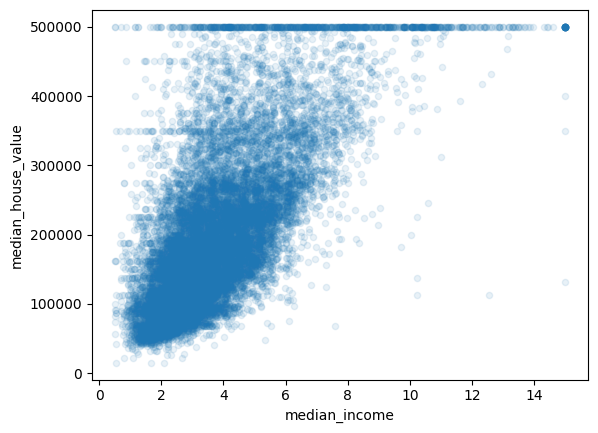

In [8]:
'''
Plot the correlation between `median_income` and `median_house_value` attributes.
'''

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

The plot reveals a few things:

* Correlation is indeed very strong. We can see the upward trend and the points are _not too dispersed_.
* Price cap is clearly visible as a horizontal line at `$500,000`.
* Plot reveals other less obvious straight lines: a horizontal line around `$450,000`, another around `$350,000`, perhaps one around `$280,000`, and a few more below that.

We may want to try removing the correspondimg districts to prevent algorithms from learning to reproduce these data quirks.

## Attribute Combinations

Additionally we can try various attribute combinations before actually preparing the data for Machine Learning algorithms. For example, the `total_rooms` in a district is not very useful if we don't know how many households there are. What we really want is the number of rooms per household. Similarly, the total number of bedrooms by itslef is not very useful: we may try compare it to the number of rooms. And the population per household also seems like an interesting attribute combination.

In [9]:
'''
Create new attributes.
'''

housing["rooms_per_household"] = housing.total_rooms / housing.households
housing["bedrooms_per_room"] = housing.total_bedrooms / housing.total_rooms
housing["population_per_household"] = housing.population / housing.households

housing.info()
housing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_per_room         16354 non-null  float64
 12  population_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [10]:
'''
Check correlations again.
'''

correlation = housing.corr(numeric_only=True)
correlation["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

The new `bedrooms_per_room` attribute is much more correlated with the `median_house_value` than `total_rooms` or `total_bedrooms` attributes. Apparently houses with a lower bedroom/room ratio tend to be more expensisve. 

The `rooms_per_household` is also more informative than `total_rooms` or `households` attributes. Obviously the larger the houses, the more expensive they are.

In [11]:
'''
Save the updated train dataset to a file.
'''

housing.to_csv(OUTBOUND_PATH + "/housing_train_updated.csv.gz", index=False, compression="gzip")